In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sb 
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\goura\Downloads\CWML\CRICKETERS_DATA (1).csv")

In [3]:
data

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,TEST
1,147,143,5238,39.68,85.25,ODI
2,71,122,6147,53.92,58.22,TEST
3,211,203,9779,58.20,92.12,ODI
4,62,58,2102,48.88,136.22,T20
...,...,...,...,...,...,...
70,77,71,1825,37.24,124.31,T20
71,62,105,4809,49.57,46.90,TEST
72,25,43,1479,39.97,55.14,TEST
73,183,177,6748,44.98,87.18,ODI


In [4]:
data["CATEGORY"].value_counts()

ODI     26
TEST    25
T20     24
Name: CATEGORY, dtype: int64

In [5]:
data.shape

(75, 6)

In [6]:
data.isna().sum()

Mat         0
Inns        0
Runs        0
Ave         0
SR          0
CATEGORY    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Mat,Inns,Runs,Ave,SR
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,93.253333,104.960000,3958.706667,38.392267,90.918400
std,76.785432,79.784412,3585.083627,13.147980,32.969055
min,4.000000,4.000000,61.000000,10.750000,26.700000
25%,46.500000,55.000000,1483.000000,30.870000,58.665000
50%,74.000000,86.000000,2779.000000,37.540000,87.180000
75%,111.500000,140.000000,6029.500000,46.575000,120.995000
max,463.000000,452.000000,18426.000000,99.940000,161.530000


<Figure size 1000x800 with 0 Axes>

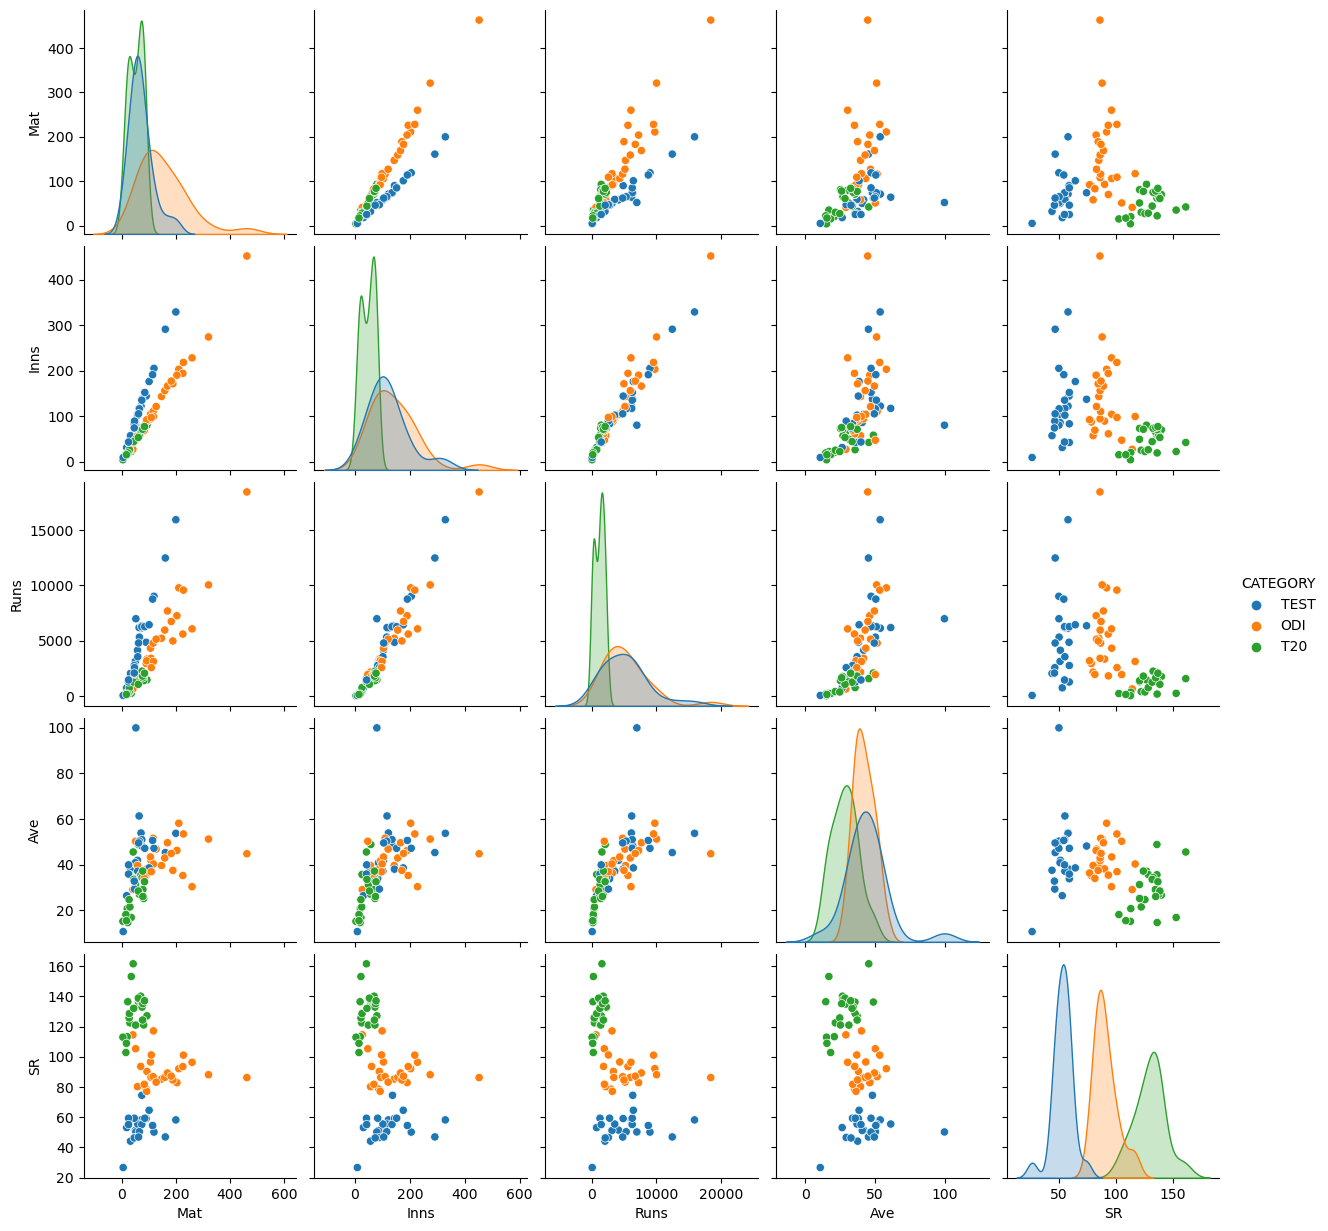

In [9]:
plt.figure(1,figsize=(10,8))
sb.pairplot(data=data,hue="CATEGORY")
plt.show()

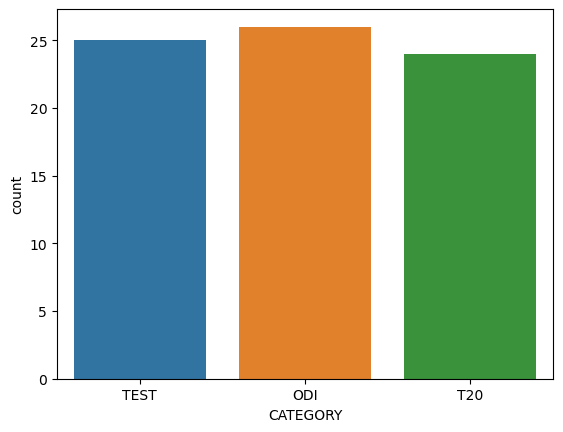

In [10]:
sb.countplot(x="CATEGORY",data=data)
plt.show()

In [11]:
data["CATEGORY"]=data["CATEGORY"].map({"TEST":1,"ODI":2,"T20":3})

In [12]:
data

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,1
1,147,143,5238,39.68,85.25,2
2,71,122,6147,53.92,58.22,1
3,211,203,9779,58.20,92.12,2
4,62,58,2102,48.88,136.22,3
...,...,...,...,...,...,...
70,77,71,1825,37.24,124.31,3
71,62,105,4809,49.57,46.90,1
72,25,43,1479,39.97,55.14,1
73,183,177,6748,44.98,87.18,2


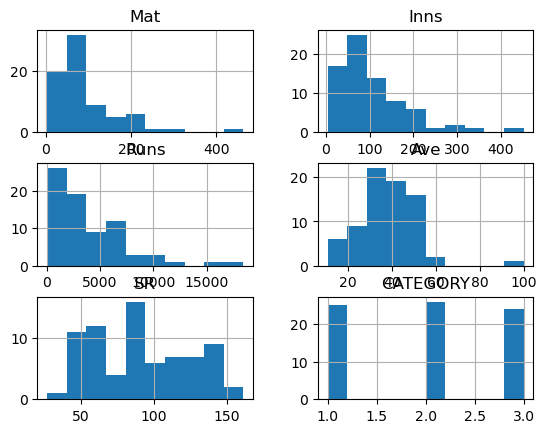

In [13]:
data.hist()
plt.show()

In [14]:
k_cluster_model=KMeans(n_clusters=5)
learner=k_cluster_model.fit(data)

In [15]:
learner.inertia_

45370836.87740331

In [16]:
k=int(np.sqrt(len(data)))

In [17]:
k_rrange=range(1,k+1)

In [18]:
n_CLUSTER=list(k_rrange)

In [19]:
learner.cluster_centers_

array([[7.16521739e+01, 7.85217391e+01, 2.57778261e+03, 3.72973913e+01,
        9.01304348e+01, 1.95652174e+00],
       [1.92333333e+02, 2.30333333e+02, 9.94350000e+03, 5.10316667e+01,
        7.21616667e+01, 1.50000000e+00],
       [1.24952381e+02, 1.44952381e+02, 5.88842857e+03, 4.79566667e+01,
        7.36247619e+01, 1.52380952e+00],
       [3.31500000e+02, 3.90500000e+02, 1.71735000e+04, 4.93050000e+01,
        7.22250000e+01, 1.50000000e+00],
       [3.93478261e+01, 3.73478261e+01, 8.67347826e+02, 2.65082609e+01,
        1.14014783e+02, 2.60869565e+00]])

In [20]:
err=[]
for i in range(len(n_CLUSTER)):
    kval=n_CLUSTER[i]
    #print(kval)
    model_kmean=KMeans(n_clusters=kval)
    learner_model=model_kmean.fit(data)
    error=learner_model.inertia_
    err.append(error)
    print(f"k value is {kval} and error is {error}")
    

k value is 1 and error is 952109652.8671227
k value is 2 and error is 353147179.4121416
k value is 3 and error is 136646165.2365911
k value is 4 and error is 75884230.13523807
k value is 5 and error is 45725078.869761966
k value is 6 and error is 31535670.787161097
k value is 7 and error is 21613508.425881233
k value is 8 and error is 13935137.2678479


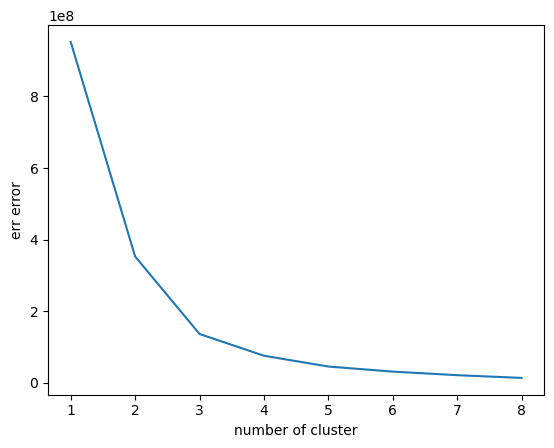

In [21]:
plt.plot(n_CLUSTER,err)
plt.xlabel("number of cluster")
plt.ylabel("err error")
plt.show()

In [22]:
learner.labels_

array([0, 2, 2, 1, 0, 3, 3, 4, 4, 2, 1, 4, 0, 0, 4, 4, 2, 4, 0, 0, 4, 0,
       4, 2, 0, 4, 2, 2, 2, 0, 0, 0, 4, 1, 0, 4, 2, 2, 4, 0, 0, 4, 4, 0,
       4, 2, 2, 4, 2, 2, 4, 2, 2, 0, 0, 2, 0, 4, 0, 4, 1, 2, 4, 0, 4, 1,
       1, 4, 0, 2, 0, 2, 4, 2, 0])

In [23]:
data["Cluster"]=learner.labels_

In [32]:
data["Cluster"]=data["Cluster"].map({0:"C1",1:"C2",2:"C3",3:"c4",4:"c5"})

<Figure size 1500x1000 with 0 Axes>

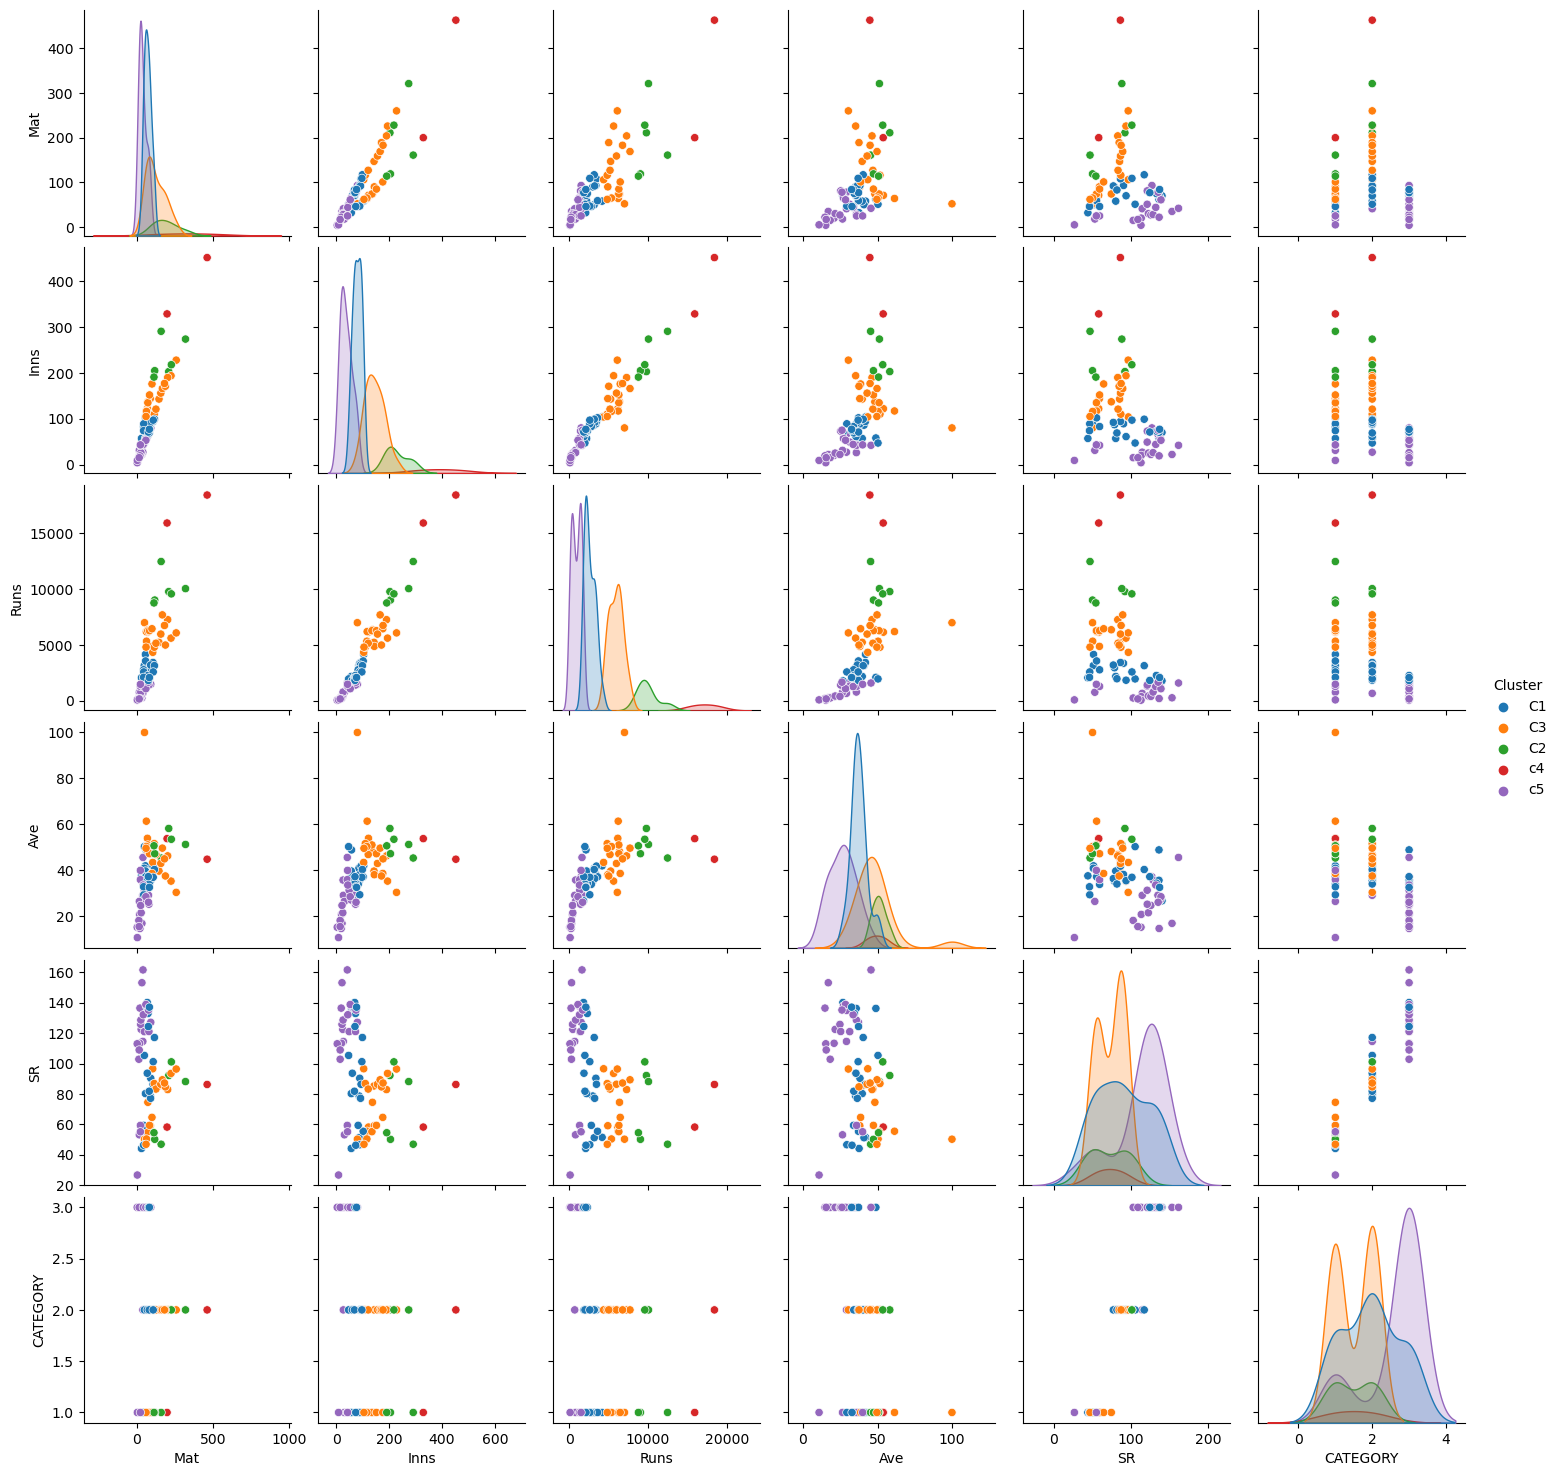

In [33]:
plt.figure(1,figsize=(15,10))
sb.pairplot(data=data,hue="Cluster")
plt.show()

In [35]:
data

,Mat,Inns,Runs,Ave,SR,CATEGORY,Cluster
0,58,104,4154,41.95,51.49,1,C1
1,147,143,5238,39.68,85.25,2,C3
2,71,122,6147,53.92,58.22,1,C3
3,211,203,9779,58.20,92.12,2,C2
4,62,58,2102,48.88,136.22,3,C1
...,...,...,...,...,...,...,...
70,77,71,1825,37.24,124.31,3,C1
71,62,105,4809,49.57,46.90,1,C3
72,25,43,1479,39.97,55.14,1,c5
73,183,177,6748,44.98,87.18,2,C3
